In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns

In [2]:
dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('talk')
sns.set_style("whitegrid")

In [33]:
def lineplot(x, y, filename=None, title=None, xlim=None, ylim=None, ax=None, fig=None, **kwargs):
    if not ax or not fig:
        fig, ax = plt.subplots()
    ax.plot(x, y, **kwargs)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y(x)$')
    ax.set_title(title)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    if show:
        plt.show()
    if filename != None:
        fig.savefig(filename, bbox_inches='tight',
                    transparent=transparent, pad_inches=0, dpi=dpi)
    return fig, ax

In [5]:
def taylor_cos(n):
    return lambda x: sum([np.power(-1,k) * np.power(x,k*2) / scipy.special.factorial(k*2) for k in range(n)])

def taylor_sin(n):
    return lambda x: sum([np.power(-1,k) * np.power(x,(2*k+1)) / scipy.special.factorial((2*k+1)) for k in range(n)])

def taylor_exp(n):
    return lambda x: sum([np.power(x,k) / scipy.special.factorial((k)) for k in range(n)])

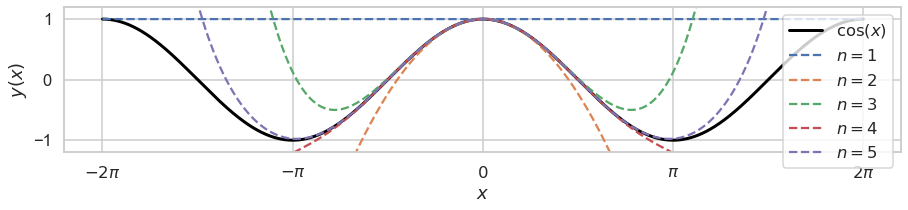

In [38]:
t = np.linspace(-2*np.pi, 2*np.pi, NUM)
N = 6
fig, ax = plt.subplots(figsize=(15,20))
fig, ax = lineplot(t, np.cos(t), ylim=[-1.2,1.2], fig=fig, ax=ax, label=r'$\cos(x)$', color='black', linewidth=3)
for n in range(1,N,1):
    amp = taylor_cos(n)(t)
    fig, ax = lineplot(t, amp, ylim=[-1.2,1.2], fig=fig, ax=ax, label=f'$n = {n}$', linestyle='--')
    ax.set_xticks(np.arange(-2*np.pi, 2*np.pi+0.01, np.pi))
    ax.set_xticklabels([r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$'])
    ax.set_aspect(1.0)
ax.legend()
    
fig.savefig('../figs/sounddesign/math/taylor_cos', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

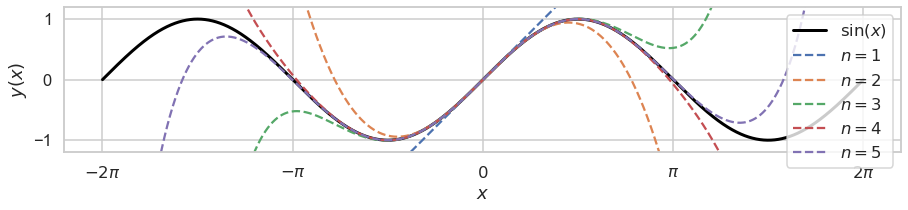

In [39]:
t = np.linspace(-2*np.pi, 2*np.pi, NUM)
N = 6
fig, ax = plt.subplots(figsize=(15,20))
fig, ax = lineplot(t, np.sin(t), ylim=[-1.2,1.2], fig=fig, ax=ax, label=r'$\sin(x)$', color='black', linewidth=3)
for n in range(1,N,1):
    amp = taylor_sin(n)(t)
    fig, ax = lineplot(t, amp, ylim=[-1.2,1.2], fig=fig, ax=ax, label=f'$n = {n}$', linestyle='--')
    ax.plot()
    ax.set_xticks(np.arange(-2*np.pi, 2*np.pi+0.01, np.pi))
    ax.set_xticklabels([r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$'])
    ax.set_aspect(1.0)
ax.legend()
fig.savefig('../figs/sounddesign/math/taylor_sin', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)

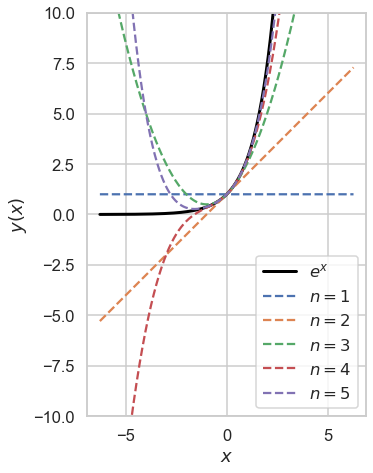

In [40]:
t = np.linspace(-2*np.pi, 2*np.pi, NUM)
N = 6
fig, ax = plt.subplots(figsize=(5,10))
fig, ax = lineplot(t, np.exp(t), ylim=[-1.2,1.2], fig=fig, ax=ax, label=r'$e^x$', color='black', linewidth=3)
for n in range(1,N,1):
    amp = taylor_exp(n)(t)
    fig, ax = lineplot(t, amp, ylim=[-10,10], fig=fig, ax=ax, label=f'$n = {n}$', linestyle='--')
    ax.set_aspect(1.0)
ax.legend()
fig.savefig('../figs/sounddesign/math/taylor_exp', bbox_inches='tight', transparent=transparent, pad_inches=0, dpi=dpi)